In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "electric-vehicle-population"

# **Import**

In [2]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──



✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     



── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/




Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘psych’




The following objects are masked from ‘package:scales’:

    alpha, rescale




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & EDA**

In [3]:
df <- read.csv('/kaggle/input/electric-vehicle-population/EV_Population.csv') %>% janitor::clean_names()

## **Data Description**
1. State: The U.S. state where the vehicle is registered.   
2. Model Year: The year the vehicle model was manufactured.   
3. Make: The manufacturer of the vehicle.     
4. Electric Vehicle Type: Type of electric vehicle.   
5. Battery Electric Vehicle (BEV)   
6. Plug-in Hybrid Electric Vehicle (PHEV)   
7. Electric Range: The range of the vehicle on electric power alone, measured in miles.   
8. Base MSRP: The manufacturer’s suggested retail price (MSRP) of the vehicle.   
9. Legislative District: The legislative district associated with the vehicle’s registration location.   
10. CAFV Eligibility Simple: A simplified indicator of the vehicle's eligibility for the Clean Alternative Fuel Vehicle (CAFV) program.   

In [4]:
str(df)

'data.frame':	92676 obs. of  8 variables:
 $ state                  : chr  "WA" "WA" "WA" "WA" ...
 $ model_year             : int  2020 2024 2024 2018 2012 2020 2020 2018 2020 2014 ...
 $ make                   : chr  "TESLA" "BMW" "BMW" "TESLA" ...
 $ electric_vehicle_type  : chr  "BEV" "PHEV" "PHEV" "BEV" ...
 $ electric_range         : int  266 39 39 215 35 308 239 238 25 84 ...
 $ base_msrp              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ legislative_district   : num  46 46 43 1 35 23 23 21 10 47 ...
 $ cafv_eligibility_simple: chr  "Eligible" "Eligible" "Eligible" "Eligible" ...


## **Summary**

In [5]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
state*,1,92676,1.000000,0.000000e+00,1,1.000000,0.0000,1,1,0,NaN,NaN,0.000000000
model_year,2,92676,2018.914940,3.277110e+00,2019,2019.013663,2.9652,1999,2025,26,-0.18842343,-0.4748611,0.010764835
make*,3,92676,21.341566,1.074925e+01,26,21.903078,10.3782,1,36,35,-0.37134188,-1.4489276,0.035309751
electric_vehicle_type*,4,92676,1.495036,4.999781e-01,1,1.493796,0.0000,1,2,1,0.01985477,-1.9996274,0.001642356
electric_range,5,92676,115.509388,9.881538e+01,73,106.127094,77.0952,6,337,331,0.56770529,-1.2504507,0.324594302
base_msrp,6,92676,2018.564461,1.139058e+04,0,0.000000,0.0000,0,845000,845000,9.80307738,357.9556140,37.416416079
legislative_district,7,92676,28.506798,1.464960e+01,32,29.315004,16.3086,1,49,48,-0.36921469,-1.1563315,0.048121813
cafv_eligibility_simple*,8,92676,1.235455,4.242850e-01,1,1.169324,0.0000,1,2,1,1.24700363,-0.4449867,0.001393715


In [6]:
summary(df)

    state             model_year       make           electric_vehicle_type
 Length:92676       Min.   :1999   Length:92676       Length:92676         
 Class :character   1st Qu.:2017   Class :character   Class :character     
 Mode  :character   Median :2019   Mode  :character   Mode  :character     
                    Mean   :2019                                           
                    3rd Qu.:2021                                           
                    Max.   :2025                                           
 electric_range    base_msrp      legislative_district cafv_eligibility_simple
 Min.   :  6.0   Min.   :     0   Min.   : 1.00        Length:92676           
 1st Qu.: 30.0   1st Qu.:     0   1st Qu.:17.00        Class :character       
 Median : 73.0   Median :     0   Median :32.00        Mode  :character       
 Mean   :115.5   Mean   :  2019   Mean   :28.51                               
 3rd Qu.:215.0   3rd Qu.:     0   3rd Qu.:41.00                          

In [7]:
skimdf <- skimr::skim(df)
print(skimdf)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             92676 
Number of columns          8     
_______________________          
Column type frequency:           
  character                4     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable           n_missing complete_rate min max empty n_unique
1 state                           0             1   2   2     0        1
2 make                            0             1   3  20     0       36
3 electric_vehicle_type           0             1   3   4     0        2
4 cafv_eligibility_simple         0             1   8  12     0        2
  whitespace
1          0
2          0
3          0
4          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable        n_

## **Missing value & Duplicate value Check**

In [8]:
na <- data.frame(NaN_Count = colSums(is.na(df)))
na

,NaN_Count
,<dbl>
state,0
model_year,0
make,0
electric_vehicle_type,0
electric_range,0
base_msrp,0
legislative_district,0
cafv_eligibility_simple,0


In [9]:
sum(duplicated(df))

[1] 81338

In [10]:
head(df)

,state,model_year,make,electric_vehicle_type,electric_range,base_msrp,legislative_district,cafv_eligibility_simple
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,WA,2020,TESLA,BEV,266,0,46,Eligible
2,WA,2024,BMW,PHEV,39,0,46,Eligible
3,WA,2024,BMW,PHEV,39,0,43,Eligible
4,WA,2018,TESLA,BEV,215,0,1,Eligible
5,WA,2012,CHEVROLET,PHEV,35,0,35,Eligible
6,WA,2020,TESLA,BEV,308,0,23,Eligible


In [11]:
tail(df)

,state,model_year,make,electric_vehicle_type,electric_range,base_msrp,legislative_district,cafv_eligibility_simple
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
92671,WA,2023,HYUNDAI,PHEV,33,0,16,Eligible
92672,WA,2015,NISSAN,BEV,84,0,30,Eligible
92673,WA,2018,TESLA,BEV,215,0,1,Eligible
92674,WA,2019,TESLA,BEV,220,0,44,Eligible
92675,WA,2022,CHRYSLER,PHEV,32,0,45,Eligible
92676,WA,2018,TESLA,BEV,215,0,41,Eligible


# **2. Data Visualization**

In [12]:
df <- unique(df)

In [13]:
num_cols <- {}
for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == T)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [14]:
num_cols

[1] "model_year"           "electric_range"       "base_msrp"           
[4] "legislative_district"

## **Histogram & Boxplot & Densityplot**

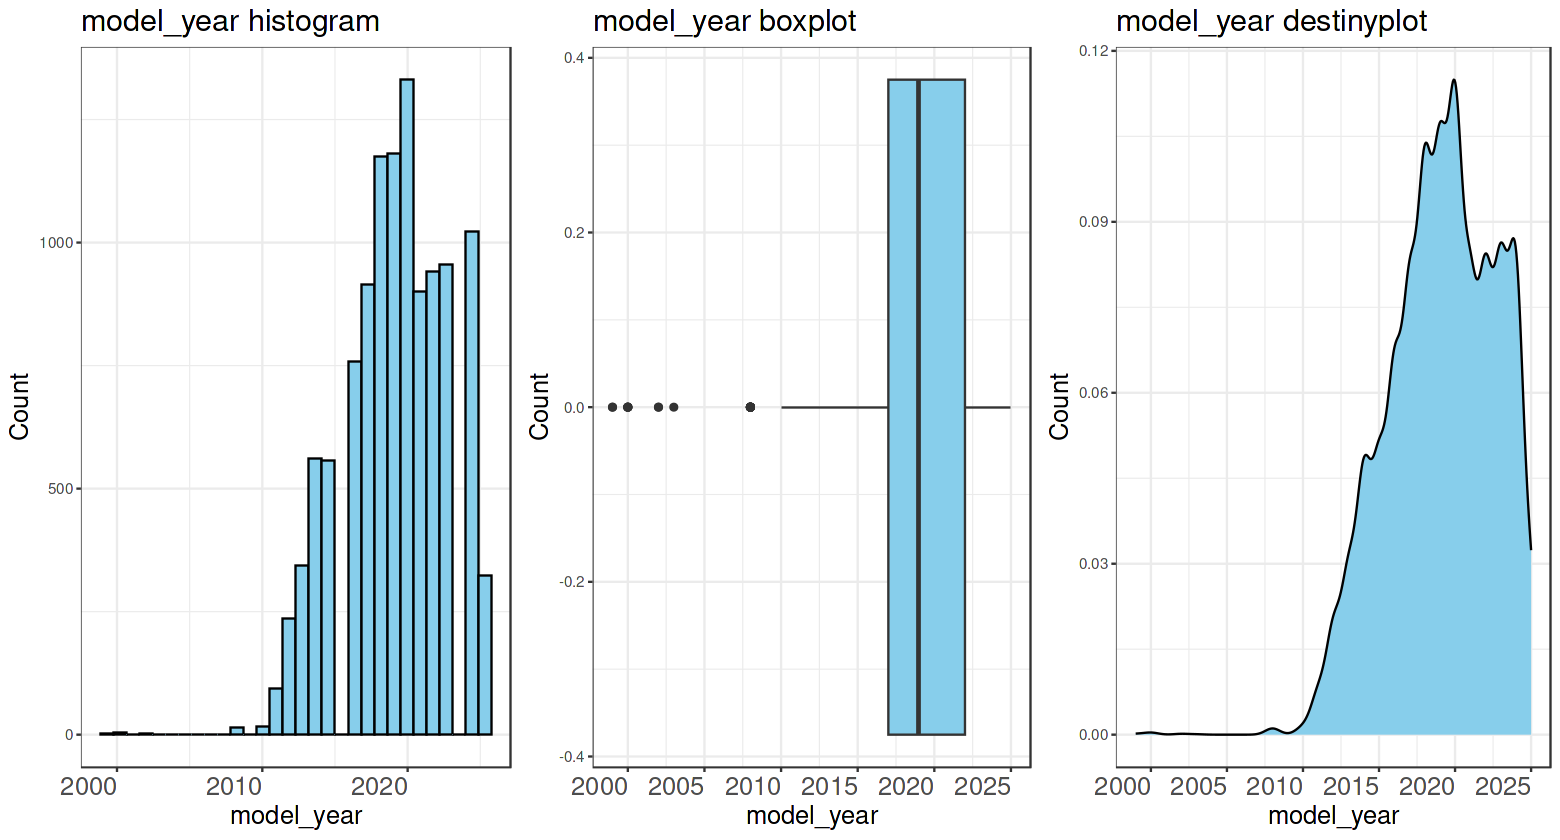

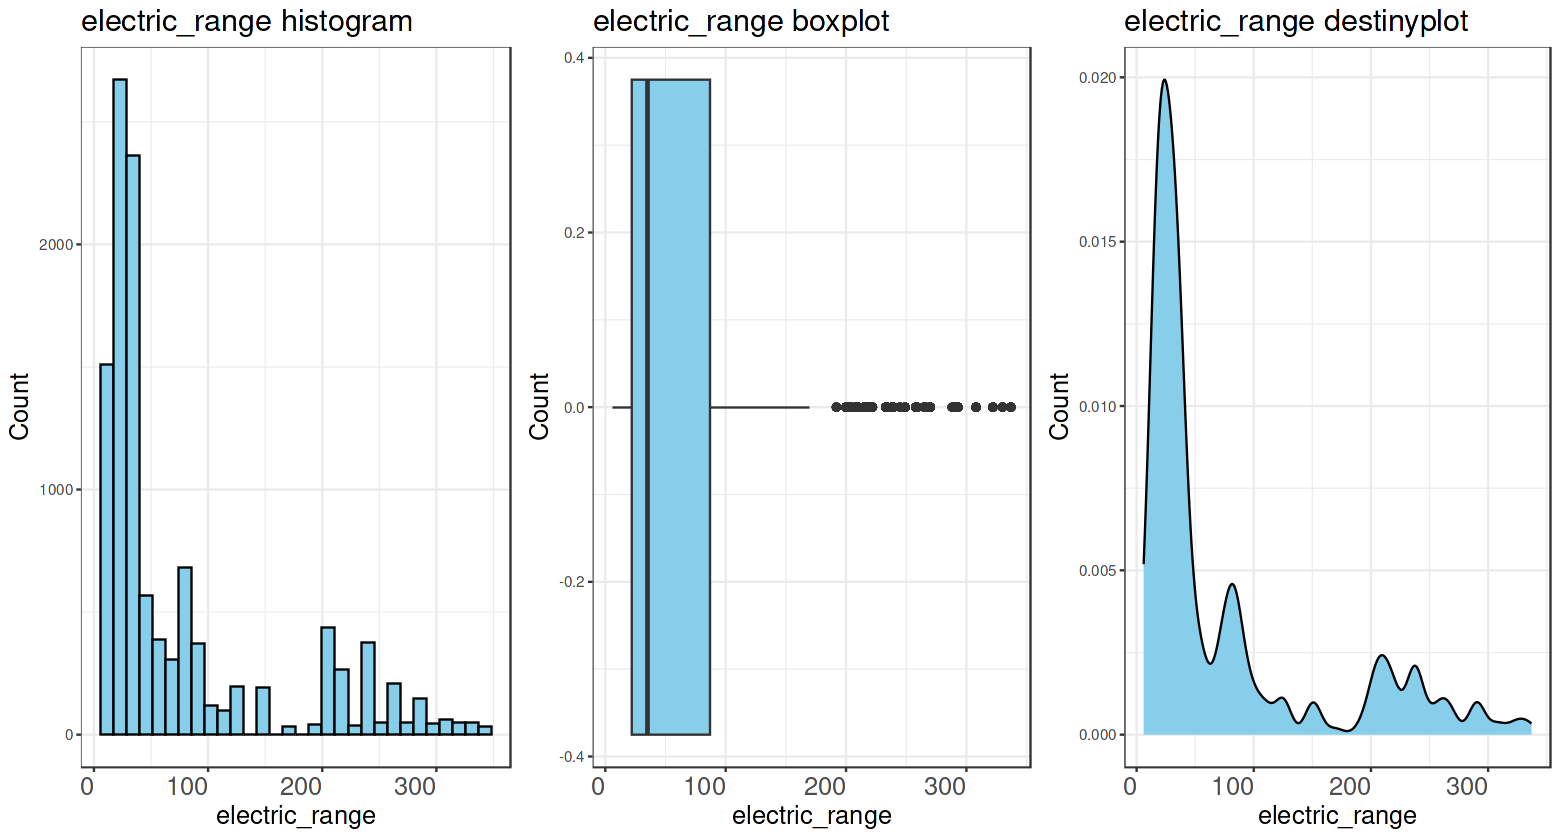

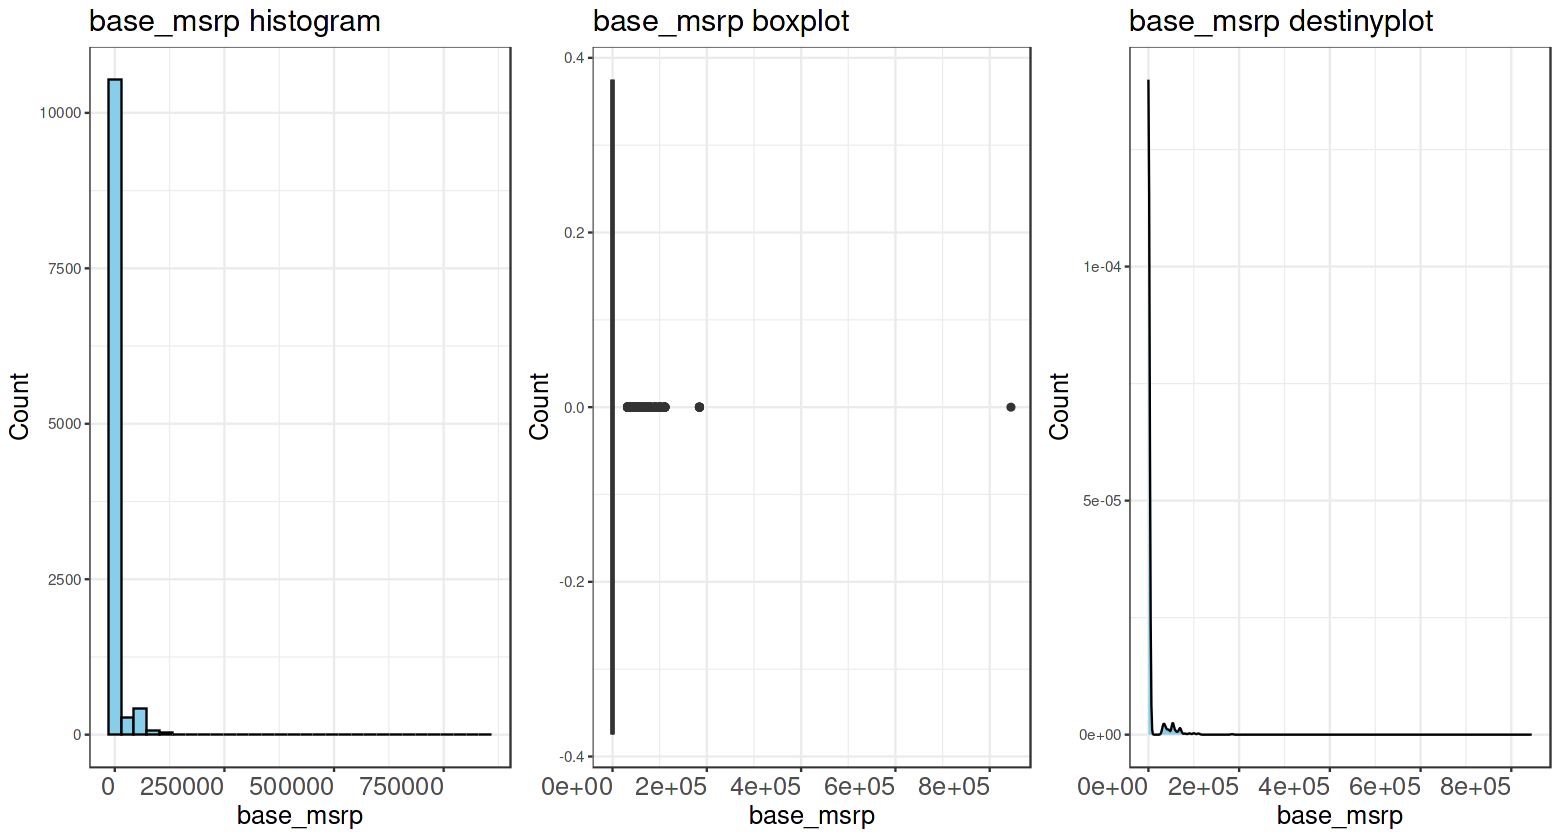

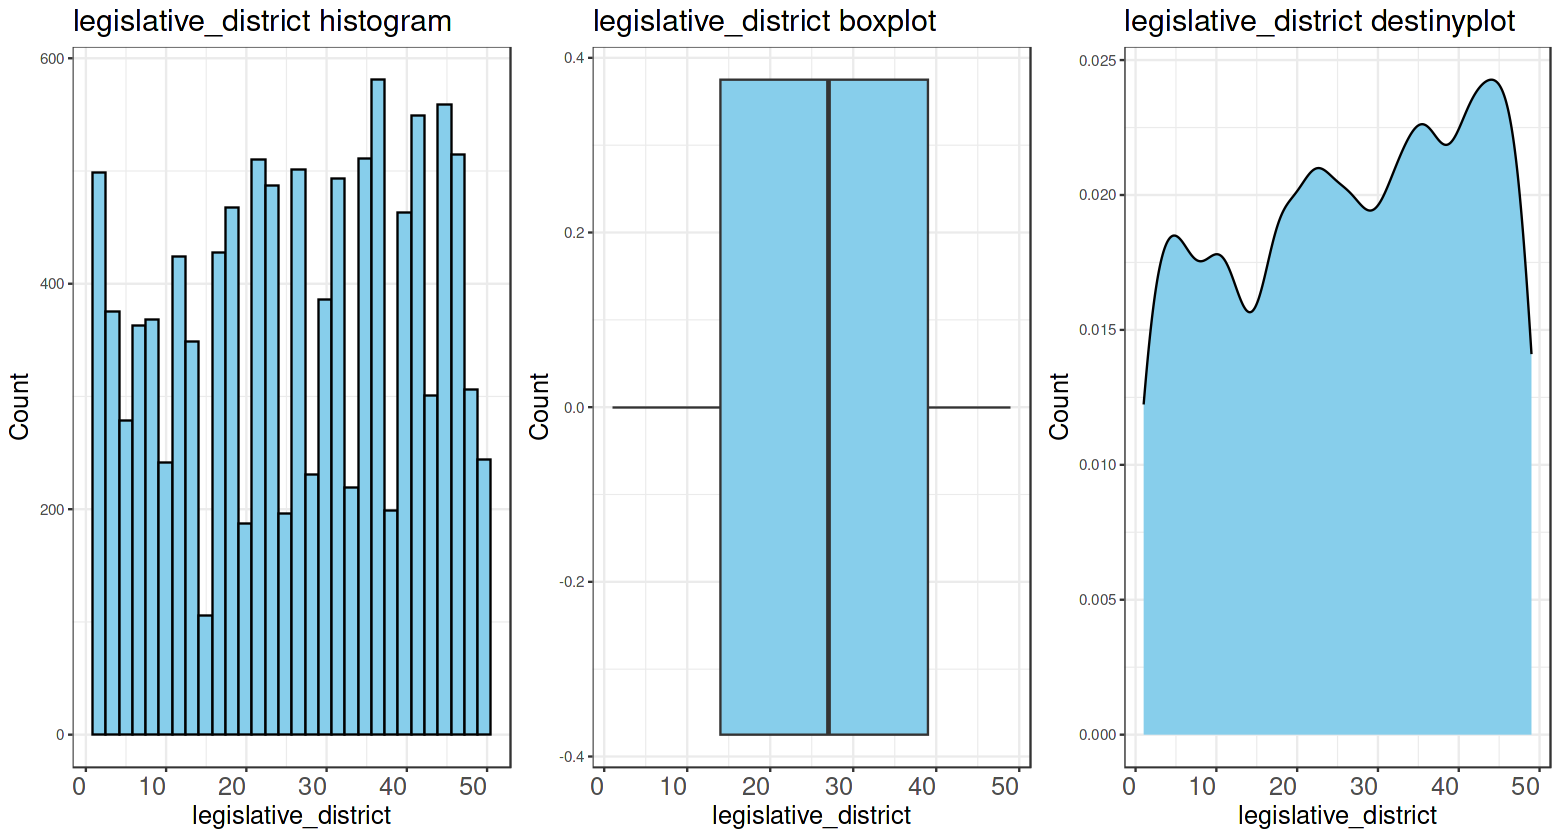

In [15]:
options(repr.plot.width = 13.0, repr.plot.height = 7.0)

for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

## **Countplot**

In [16]:
cat_cols <- {}
for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == F)
        cat_cols <- c(cat_cols ,colnames(df[i]))
}

In [17]:
cat_cols

[1] "state"                   "make"                   
[3] "electric_vehicle_type"   "cafv_eligibility_simple"

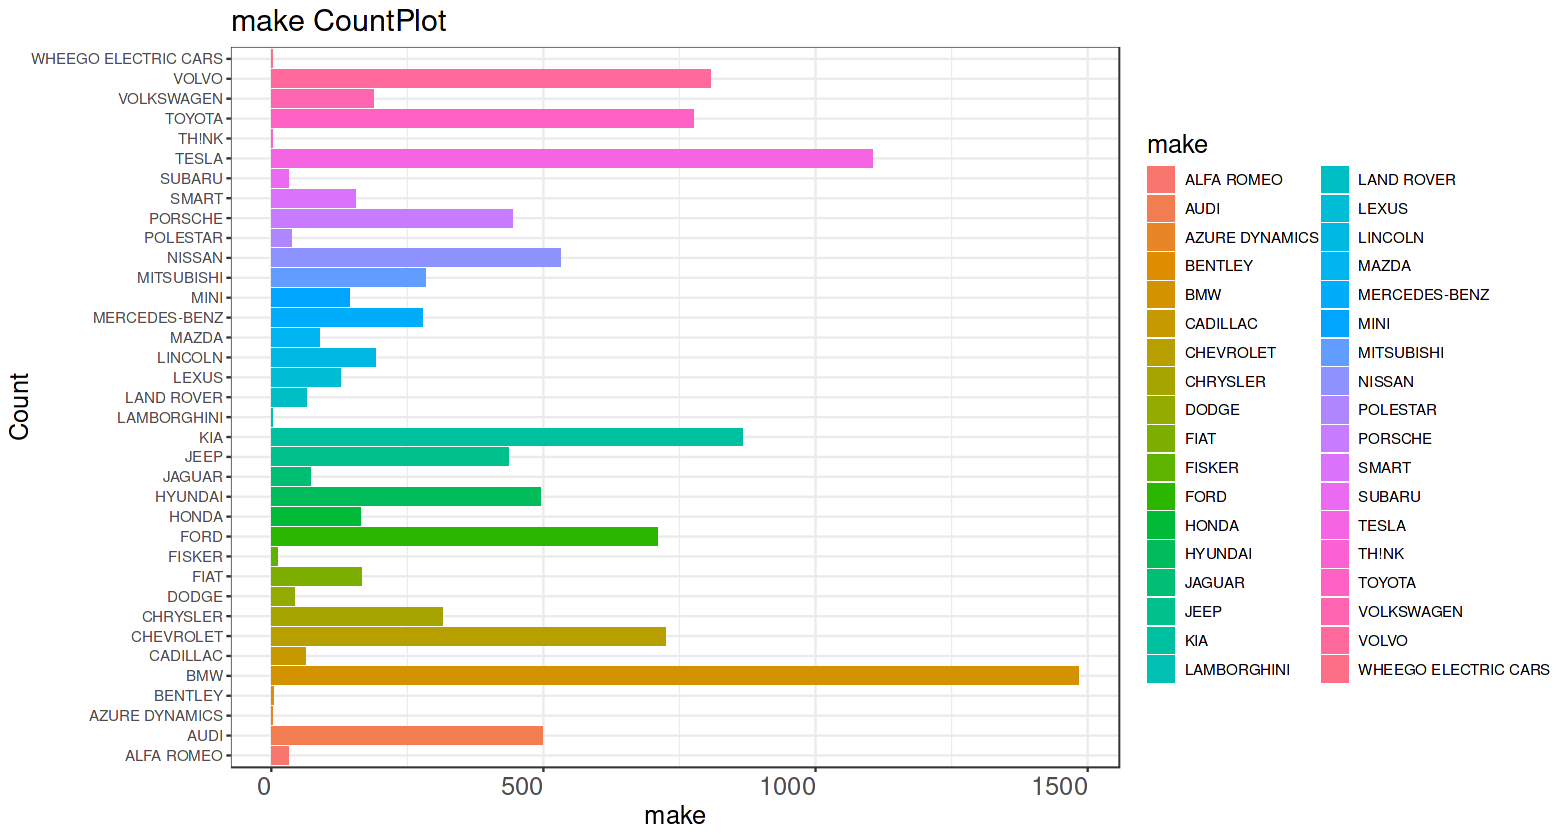

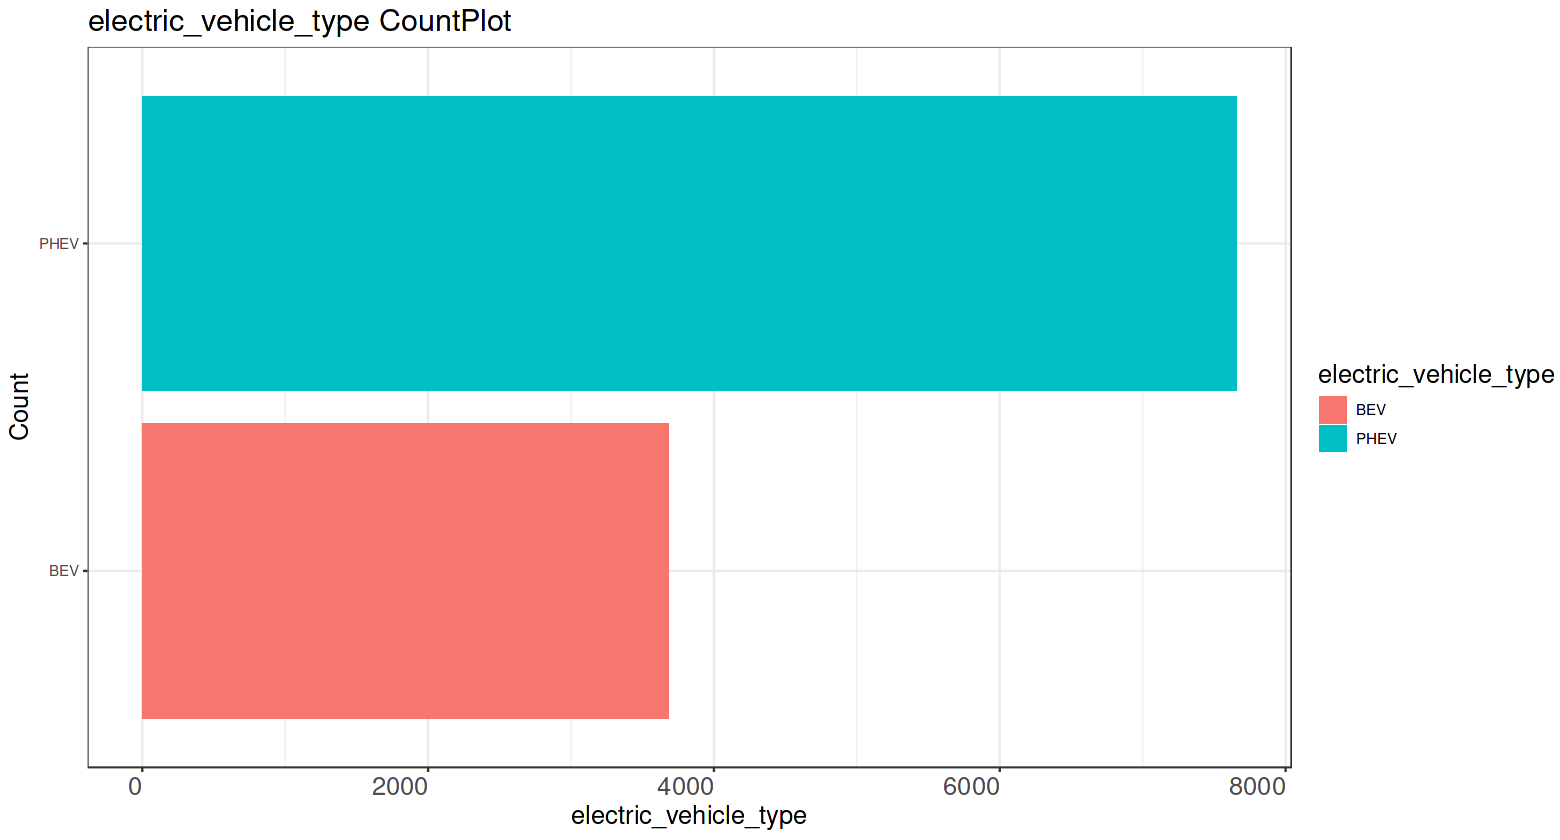

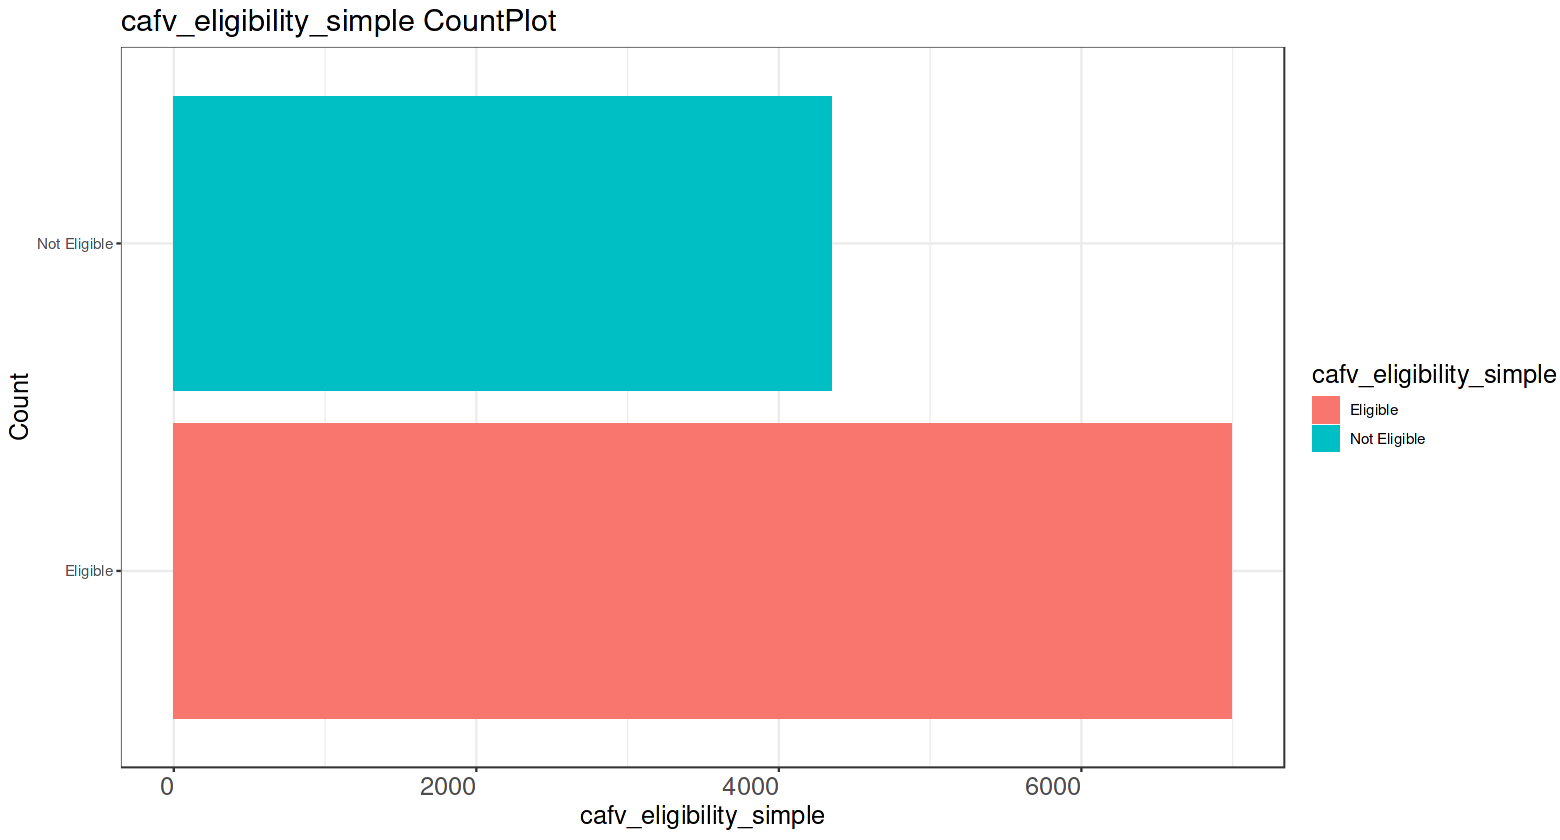

In [18]:
for(i in cat_cols[2:4]){
    a <- ggplot(df) + geom_bar(aes(y = df[,i], fill = df[,i])) + 
            labs(title = paste0(names(df[i]),' CountPlot'), x = names(df[i]), y = 'Count', fill = i ) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1,),
            title = element_text(size=15)
            )
    grid.arrange(a, ncol = 1)  
}

## **Electric range by Year**

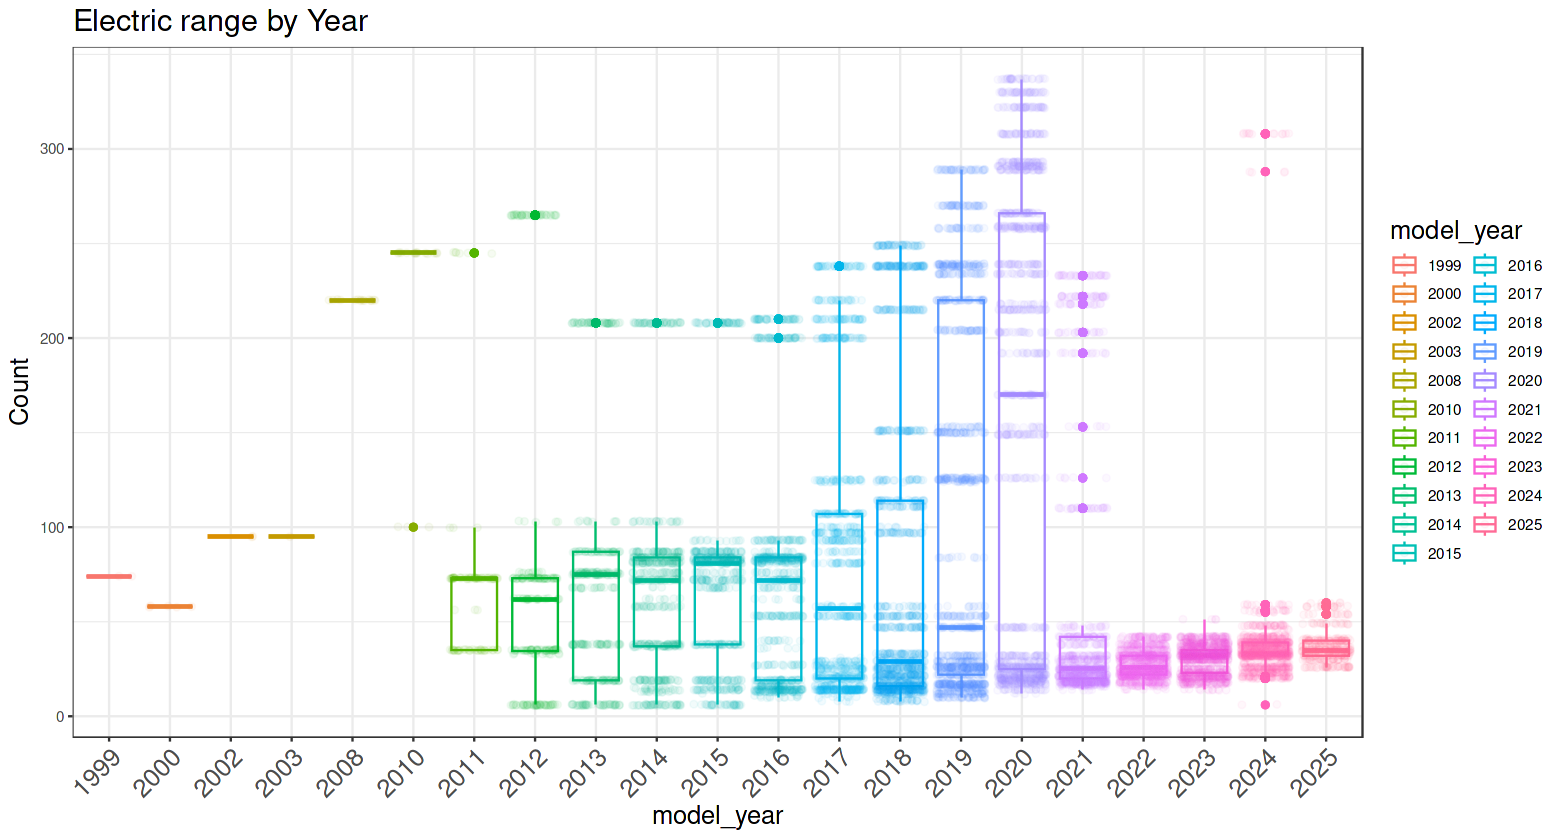

In [19]:
ggplot(df) + geom_boxplot(aes(x = factor(model_year), y = electric_range , color = factor(model_year))) +
            geom_jitter(aes(x = factor(model_year), y = electric_range , color = factor(model_year)), alpha = 0.05)+
            labs(title = 'Electric range by Year', x = 'model_year', y = 'Count', color = 'model_year' ) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1, angle = 45),
            title = element_text(size=15)
            )

## **Average Electric range by Cafv**

In [20]:
avg_elt_range <- df %>% group_by(cafv_eligibility_simple) %>% summarize(Avg_electric_range = mean(electric_range, na.rm = T))

In [21]:
avg_elt_range

cafv_eligibility_simple,Avg_electric_range
<chr>,<dbl>
Eligible,109.43650
Not Eligible,19.56765


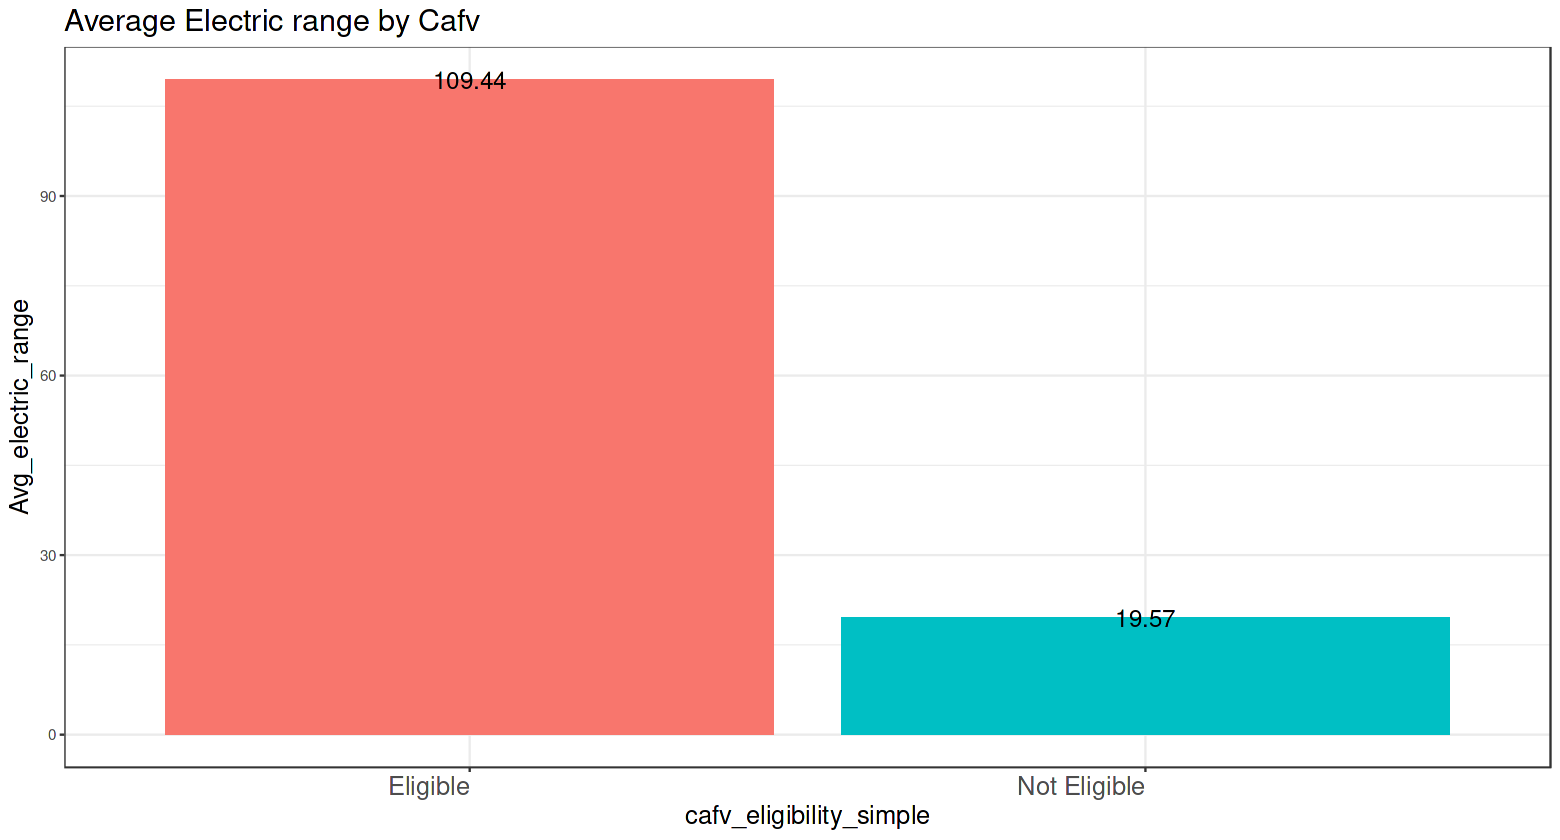

In [22]:
ggplot(avg_elt_range) + geom_col(aes(x= factor(cafv_eligibility_simple), y = Avg_electric_range, fill = factor(cafv_eligibility_simple))) + 
            geom_text(aes(x = factor(cafv_eligibility_simple) , y = Avg_electric_range , label = round(Avg_electric_range,2)),size = 5)+
            labs(title = 'Average Electric range by Cafv', x = 'cafv_eligibility_simple', y = 'Avg_electric_range') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

## **Average Base msrp(The Manufacturer’s suggested retail price) by electric vehicle type**

In [23]:
avg_msrp <- df %>% group_by(electric_vehicle_type) %>% summarize(Avg_base_msrp = mean(base_msrp, na.rm = T))

In [24]:
avg_msrp

electric_vehicle_type,Avg_base_msrp
<chr>,<dbl>
BEV,4580.369
PHEV,3729.873


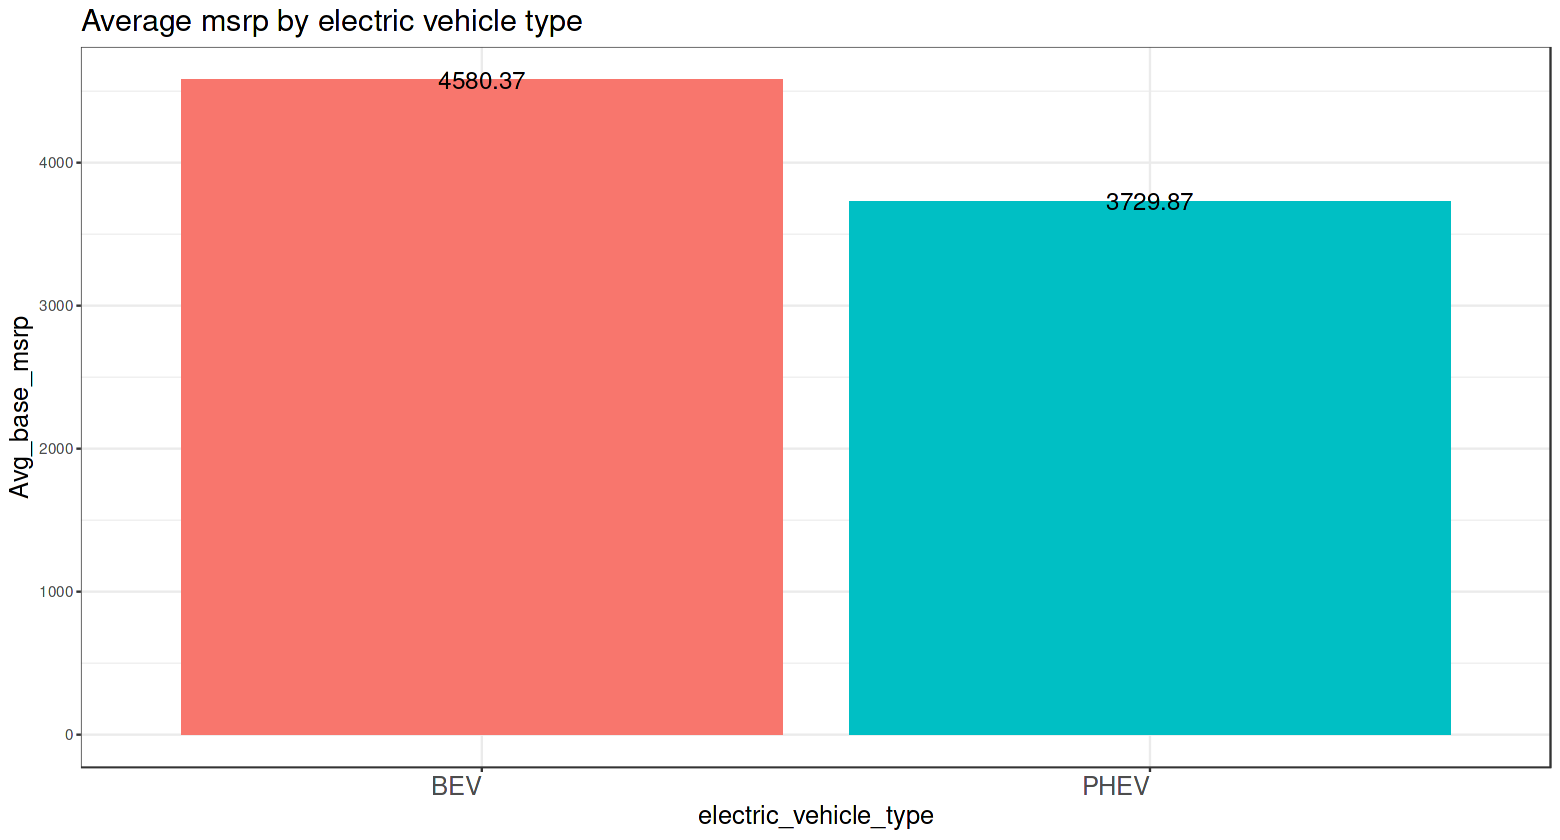

In [25]:
ggplot(avg_msrp) + geom_col(aes(x= factor(electric_vehicle_type), y = Avg_base_msrp, fill = factor(electric_vehicle_type))) + 
            geom_text(aes(x = factor(electric_vehicle_type) , y = Avg_base_msrp , label = round(Avg_base_msrp,2)),size = 5)+
            labs(title = 'Average msrp by electric vehicle type', x = 'electric_vehicle_type', y = 'Avg_base_msrp') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

## **Correlation**

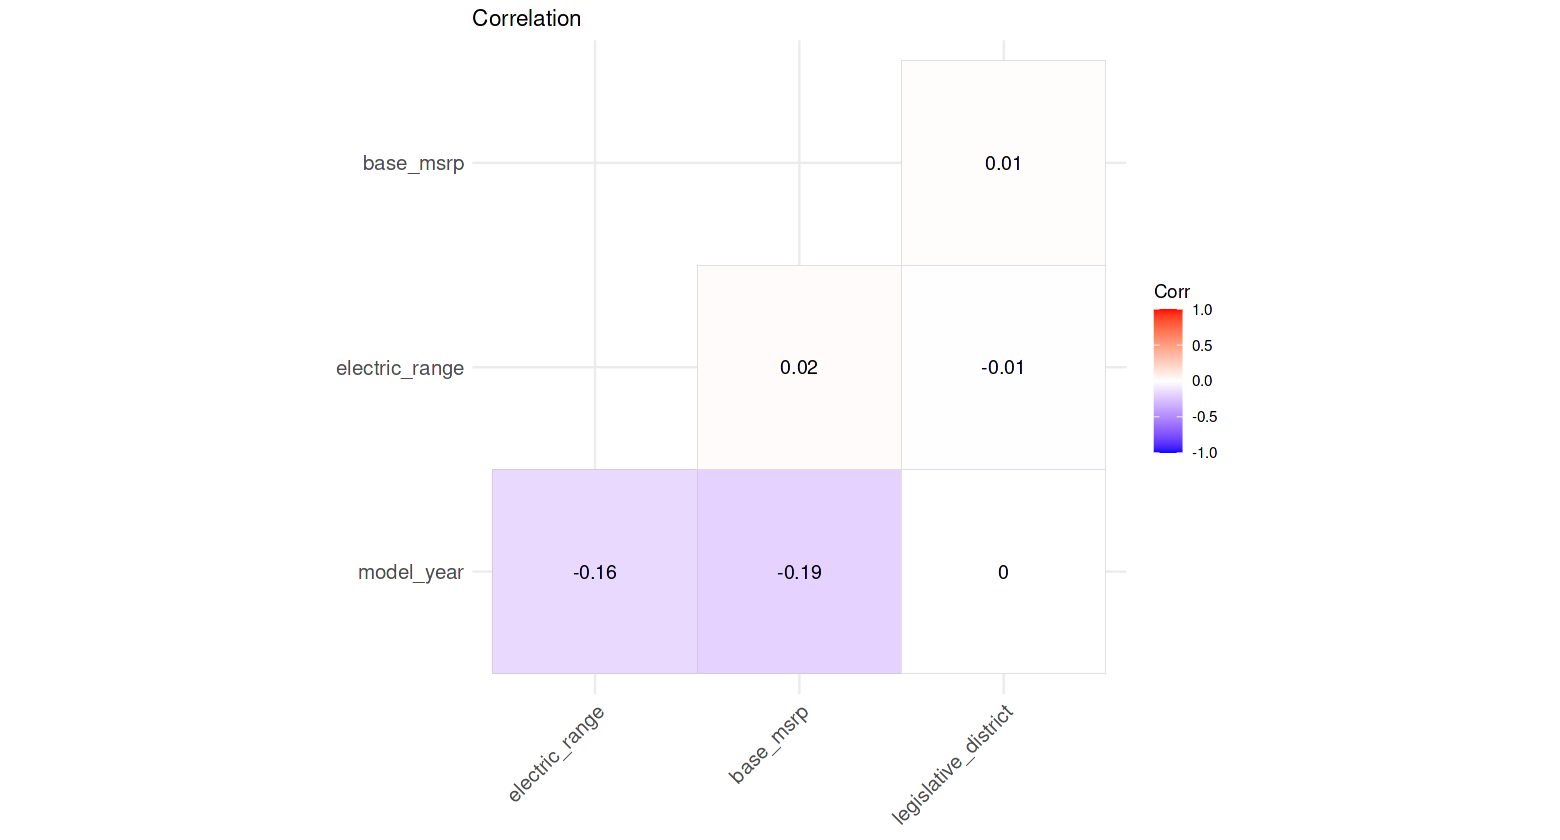

In [26]:
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

# **3. Modeling**

## **Preprocessing**

In [27]:
df <- df %>% select(-state)

In [28]:
#Character -> Factor

for(i in 1:length(df)){
    if(is.character(df[,i]) == TRUE)
        df[,i] <- as.factor(df[,i])
}

In [29]:
for(i in 1:length(df)){
    if(is.factor(df[,i]) == TRUE)
        df[,i] <- as.numeric(df[,i])
}

In [30]:
df$cafv_eligibility_simple <- as.factor(df$cafv_eligibility_simple)

## **Train Test Split**

In [31]:
split <- rsample::initial_split(df, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **5 FOLD**

In [32]:
set.seed(123)
folds <- 
    train %>%
    vfold_cv(v = 5, strata = cafv_eligibility_simple)

## **Recipe(XGB Model)**

In [33]:
rec <- recipe(cafv_eligibility_simple ~ ., data = train) %>%
    step_normalize(all_numeric_predictors()) 

In [34]:
# Model
xgb <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", ) %>%
  set_mode(mode = "classification")

In [35]:
# Workflow
xgb_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(xgb)

# params
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

#Controol

xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

In [36]:
xgb_tune <- tune_grid(
  xgb_wf,
  resamples = folds,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(roc_auc),
  param_info = params
)

i Fold1: preprocessor 1/1



✓ Fold1: preprocessor 1/1



i Fold1: preprocessor 1/1, model 1/4



✓ Fold1: preprocessor 1/1, model 1/4



i Fold1: preprocessor 1/1, model 1/4 (extracts)



i Fold1: preprocessor 1/1, model 1/4 (predictions)



i Fold1: preprocessor 1/1, model 2/4



✓ Fold1: preprocessor 1/1, model 2/4



i Fold1: preprocessor 1/1, model 2/4 (extracts)



i Fold1: preprocessor 1/1, model 2/4 (predictions)



i Fold1: preprocessor 1/1, model 3/4



✓ Fold1: preprocessor 1/1, model 3/4



i Fold1: preprocessor 1/1, model 3/4 (extracts)



i Fold1: preprocessor 1/1, model 3/4 (predictions)



i Fold1: preprocessor 1/1, model 4/4



✓ Fold1: preprocessor 1/1, model 4/4



i Fold1: preprocessor 1/1, model 4/4 (extracts)



i Fold1: preprocessor 1/1, model 4/4 (predictions)



i Fold2: preprocessor 1/1



✓ Fold2: preprocessor 1/1



i Fold2: preprocessor 1/1, model 1/4



✓ Fold2: preprocessor 1/1, model 1/4



i Fold2: preprocessor 1/1, model 1/4 (extracts)



i Fold2: preprocessor 1/1, model 1/4 (predictions)



i Fold2: preprocessor 1/1, model 2/4



✓ Fold2: preprocessor 1/1, model 2/4



i Fold2: preprocessor 1/1, model 2/4 (extracts)



i Fold2: preprocessor 1/1, model 2/4 (predictions)



i Fold2: preprocessor 1/1, model 3/4



✓ Fold2: preprocessor 1/1, model 3/4



i Fold2: preprocessor 1/1, model 3/4 (extracts)



i Fold2: preprocessor 1/1, model 3/4 (predictions)



i Fold2: preprocessor 1/1, model 4/4



✓ Fold2: preprocessor 1/1, model 4/4



i Fold2: preprocessor 1/1, model 4/4 (extracts)



i Fold2: preprocessor 1/1, model 4/4 (predictions)



i Fold3: preprocessor 1/1



✓ Fold3: preprocessor 1/1



i Fold3: preprocessor 1/1, model 1/4



✓ Fold3: preprocessor 1/1, model 1/4



i Fold3: preprocessor 1/1, model 1/4 (extracts)



i Fold3: preprocessor 1/1, model 1/4 (predictions)



i Fold3: preprocessor 1/1, model 2/4



✓ Fold3: preprocessor 1/1, model 2/4



i Fold3: preprocessor 1/1, model 2/4 (extracts)



i Fold3: preprocessor 1/1, model 2/4 (predictions)



i Fold3: preprocessor 1/1, model 3/4



✓ Fold3: preprocessor 1/1, model 3/4



i Fold3: preprocessor 1/1, model 3/4 (extracts)



i Fold3: preprocessor 1/1, model 3/4 (predictions)



i Fold3: preprocessor 1/1, model 4/4



✓ Fold3: preprocessor 1/1, model 4/4



i Fold3: preprocessor 1/1, model 4/4 (extracts)



i Fold3: preprocessor 1/1, model 4/4 (predictions)



i Fold4: preprocessor 1/1



✓ Fold4: preprocessor 1/1



i Fold4: preprocessor 1/1, model 1/4



✓ Fold4: preprocessor 1/1, model 1/4



i Fold4: preprocessor 1/1, model 1/4 (extracts)



i Fold4: preprocessor 1/1, model 1/4 (predictions)



i Fold4: preprocessor 1/1, model 2/4



✓ Fold4: preprocessor 1/1, model 2/4



i Fold4: preprocessor 1/1, model 2/4 (extracts)



i Fold4: preprocessor 1/1, model 2/4 (predictions)



i Fold4: preprocessor 1/1, model 3/4



✓ Fold4: preprocessor 1/1, model 3/4



i Fold4: preprocessor 1/1, model 3/4 (extracts)



i Fold4: preprocessor 1/1, model 3/4 (predictions)



i Fold4: preprocessor 1/1, model 4/4



✓ Fold4: preprocessor 1/1, model 4/4



i Fold4: preprocessor 1/1, model 4/4 (extracts)



i Fold4: preprocessor 1/1, model 4/4 (predictions)



i Fold5: preprocessor 1/1



✓ Fold5: preprocessor 1/1



i Fold5: preprocessor 1/1, model 1/4



✓ Fold5: preprocessor 1/1, model 1/4



i Fold5: preprocessor 1/1, model 1/4 (extracts)



i Fold5: preprocessor 1/1, model 1/4 (predictions)



i Fold5: preprocessor 1/1, model 2/4



✓ Fold5: preprocessor 1/1, model 2/4



i Fold5: preprocessor 1/1, model 2/4 (extracts)



i Fold5: preprocessor 1/1, model 2/4 (predictions)



i Fold5: preprocessor 1/1, model 3/4



✓ Fold5: preprocessor 1/1, model 3/4



i Fold5: preprocessor 1/1, model 3/4 (extracts)



i Fold5: preprocessor 1/1, model 3/4 (predictions)



i Fold5: preprocessor 1/1, model 4/4



✓ Fold5: preprocessor 1/1, model 4/4



i Fold5: preprocessor 1/1, model 4/4 (extracts)



i Fold5: preprocessor 1/1, model 4/4 (predictions)



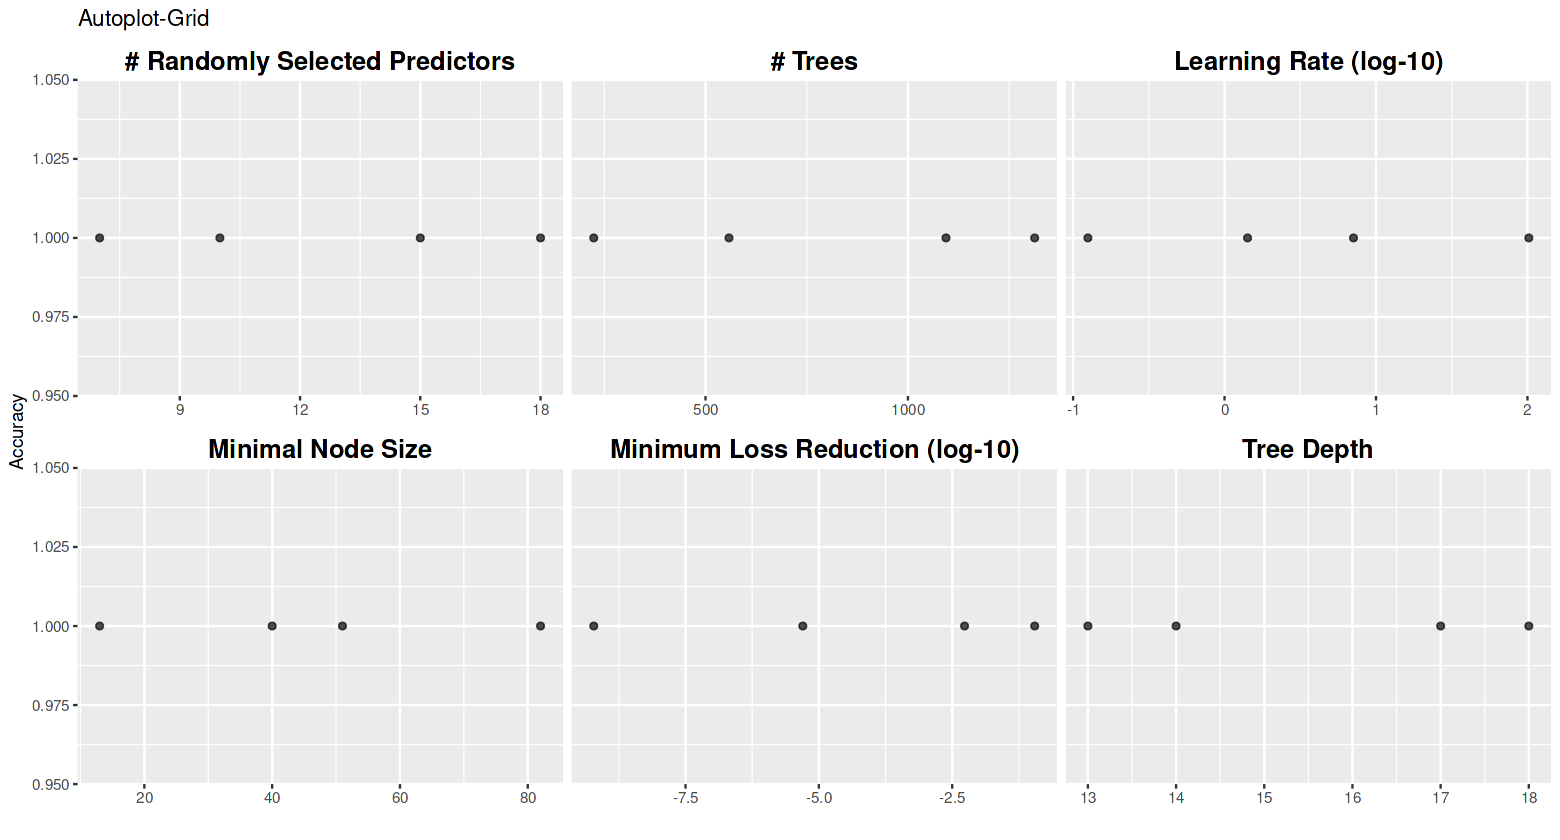

In [37]:
autoplot(xgb_tune) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    
  ) +
  labs(title = "Autoplot-Grid",
    y = "Accuracy")

In [38]:
xgb_best <- select_best(xgb_tune, metric = "roc_auc")

In [39]:
xgb_best

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
7,558,13,13,102.1059,6.022097e-10,Preprocessor1_Model1


In [40]:
set.seed(123)

final_xgb_res <-
  xgb_wf %>%
  finalize_workflow(xgb_best) 

final_xgb_res

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = 7
  trees = 558
  min_n = 13
  tree_depth = 13
  learn_rate = 102.105924169008
  loss_reduction = 6.02209692251713e-10

Computational engine: xgboost 


In [41]:
final_fit <- xgb_wf %>%
  finalize_workflow(select_best(xgb_tune, metric = "roc_auc")) %>%
  fit(train)

## **Prediction**

In [42]:
pred <- predict(final_fit, new_data = test, type = 'class')

In [43]:
pred <- as.data.frame(pred)
cm_xgb <- caret::confusionMatrix(pred$.pred_class, test$cafv_eligibility_simple)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1 1418    0
         2    0  850
                                     
               Accuracy : 1          
                 95% CI : (0.9984, 1)
    No Information Rate : 0.6252     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6252     
         Detection Rate : 0.6252     
   Detection Prevalence : 0.6252     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 1          
                                     

## **HeatMap**

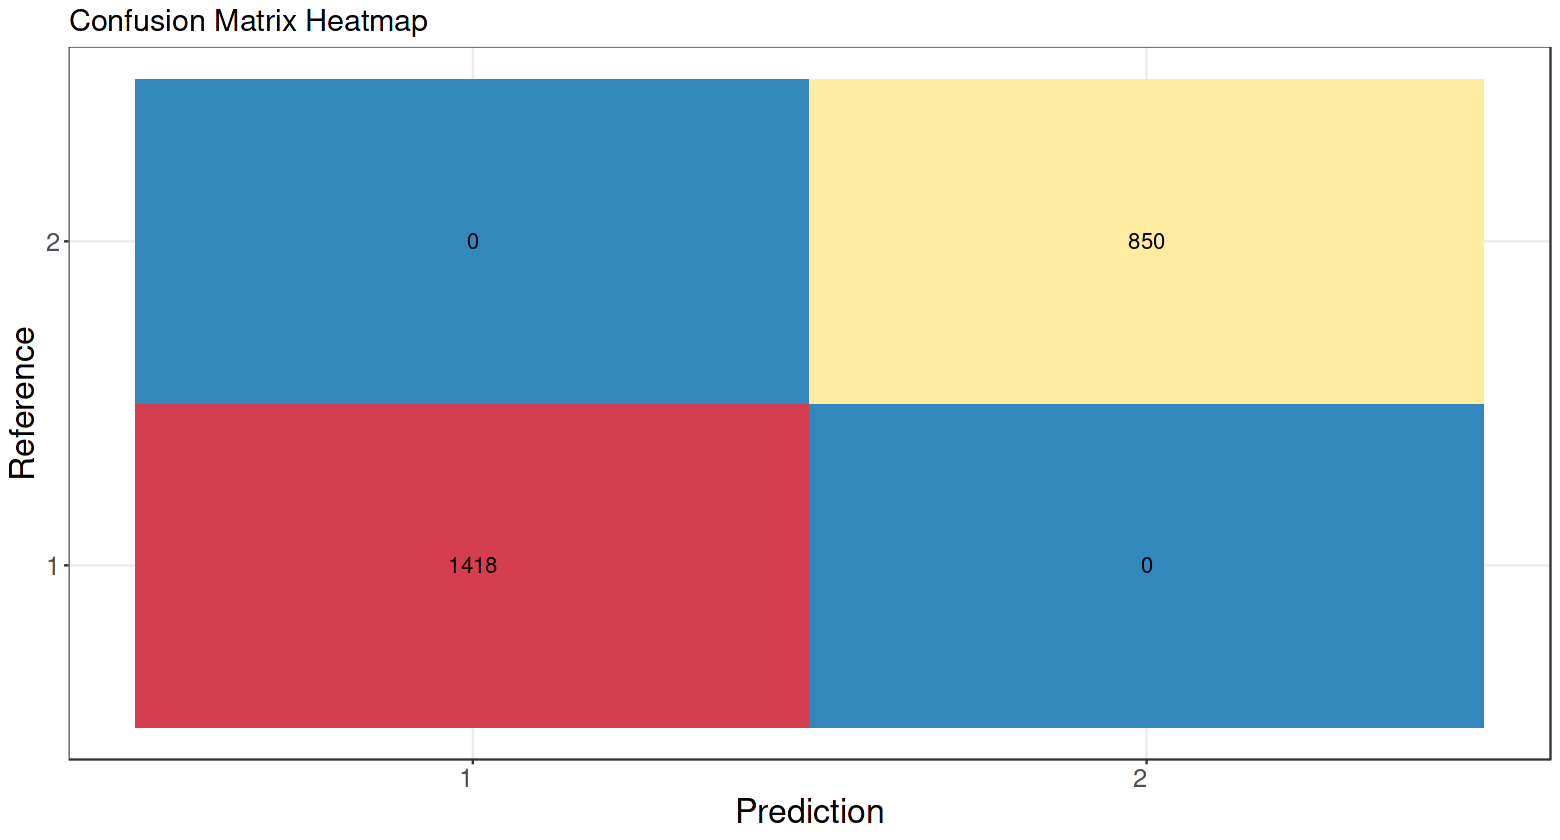

In [44]:
xgb_heatmap <- data.frame(cm_xgb$table)

ggplot(xgb_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )